# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_results_merged = pd.merge(mouse_metadata, study_results, how='outer', on= "Mouse ID")

# Display the data table for preview
data_results_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice.
mice_number = data_results_merged["Mouse ID"].nunique()
mice_number

249

In [11]:
# Our data should be uniquely identified by Mouse ID and Timepoint
dup_mouse=data_results_merged.loc[data_results_merged.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse

array(['g989'], dtype=object)

In [12]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data=data_results_merged.loc[data_results_merged["Mouse ID"]=="g989",:]
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=data_results_merged[data_results_merged['Mouse ID'].isin(dup_mouse)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_data["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean=clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median=clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var=clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std=clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem=clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()
# Assemble the resulting series into a single summary DataFrame.
summary_statistics=pd.DataFrame({"Mean Tumor Volume":mean,
                                 "Median Tumor Volume":median,
                                 "Tumor Volume Variance":var,
                                 "Tumor Volume Std. Dev.":std,
                                 "Tumor Volume Std. Err.":sem})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation=clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

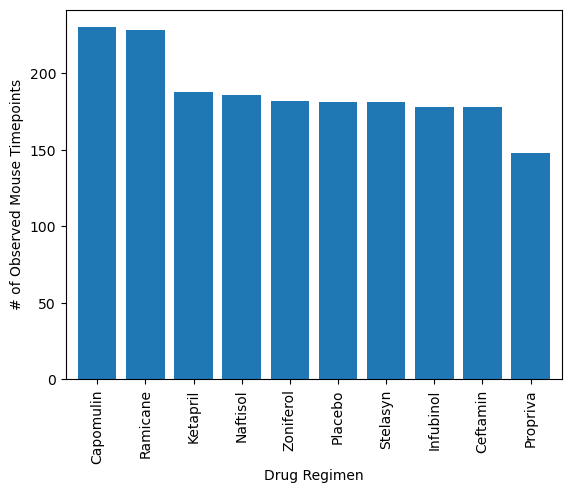

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Total number for each drug
mouse_drug=clean_data["Drug Regimen"].value_counts()
#Bar graph: total rows for each drug
plot_pandas=mouse_drug.plot.bar(width=0.8)
#labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

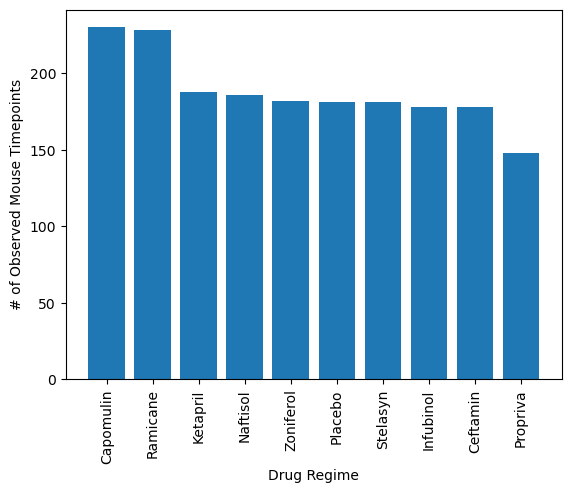

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=mouse_drug.index.values
y_axis=mouse_drug.values
plt.bar(x_axis,y_axis)
#labels
plt.xlabel("Drug Regime")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

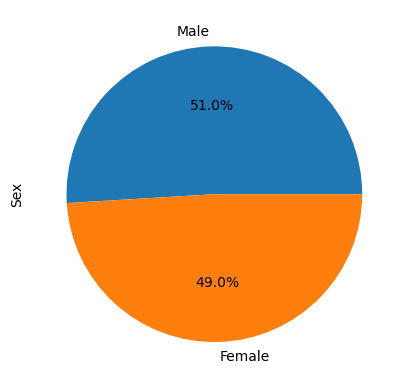

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df=clean_data["Sex"].value_counts()
gender_df.plot.pie(autopct="%1.1f%%")
plt.show()

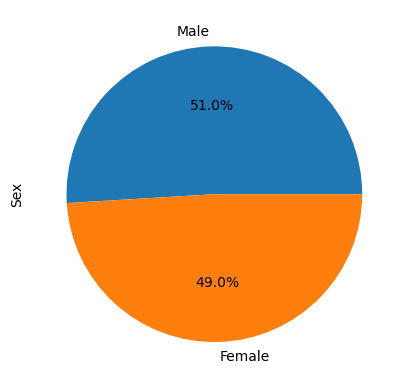

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=['Female','Male']
sizes=[49.7999197,50.200803]
plot=gender_df.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs=data_results_merged[data_results_merged["Drug Regimen"].isin(drug_list)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=drugs.groupby(["Drug Regimen","Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint=last_timepoint.stack(level=0).unstack(level=0)


In [92]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

treatment = 0 
for drug in drug_list:
    quartiles=last_timepoint[drug].quantile([0.25,0.5,0.75])
    lower_quartile=quartiles[0.25]
    upper_quartile=quartiles[0.75]
    iqr=upper_quartile-lower_quartile
    lower_iqr=lower_quartile-(1.5*iqr)
    upper_iqr=upper_quartile+(1.5*iqr)

# Create empty list to fill with tumor vol data (for plotting)

    if treatment == 0:
        print(f"The lower quartile of {drug} treatment is: {lower_quartile}")
        print(f"The upper quartile of {drug} treatment is: {upper_quartile}")
        print(f"The interquartile range of {drug} treatment is: {iqr}")
        print(f"The pottential lower outliers of {drug} treatments are the values below: {lower_iqr}")
        print(f"The pottential upper outliers of {drug} treatments are the values above: {upper_iqr}")
        
        

The lower quartile of Capomulin treatment is: 32.37735684
The upper quartile of Capomulin treatment is: 40.1592203
The interquartile range of Capomulin treatment is: 7.781863460000004
The pottential lower outliers of Capomulin treatments are the values below: 20.70456164999999
The pottential upper outliers of Capomulin treatments are the values above: 51.83201549
The lower quartile of Ramicane treatment is: 31.56046955
The upper quartile of Ramicane treatment is: 40.65900627
The interquartile range of Ramicane treatment is: 9.098536719999998
The pottential lower outliers of Ramicane treatments are the values below: 17.912664470000003
The pottential upper outliers of Ramicane treatments are the values above: 54.30681135
The lower quartile of Infubinol treatment is: 54.04860769
The upper quartile of Infubinol treatment is: 65.52574285
The interquartile range of Infubinol treatment is: 11.477135160000003
The pottential lower outliers of Infubinol treatments are the values below: 36.832904

ConversionError: Failed to convert value(s) to axis units: ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

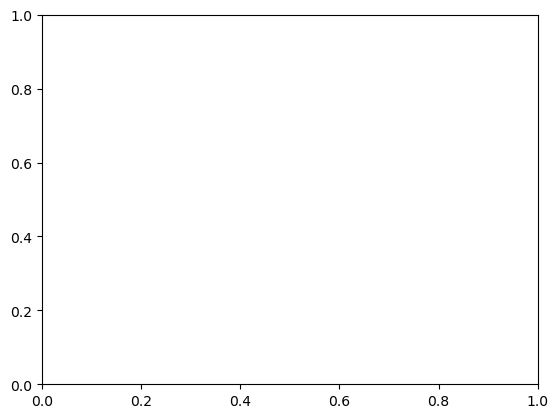

In [102]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot=[]
regimen=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
for drug in drug_list:
    boxplot.append(list(last_timepoint[drug].dropna()))
figure=plt.figure()
plt.xticks(regimen)
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(boxplot)
plt.show()
#boxplot

## Line and Scatter Plots

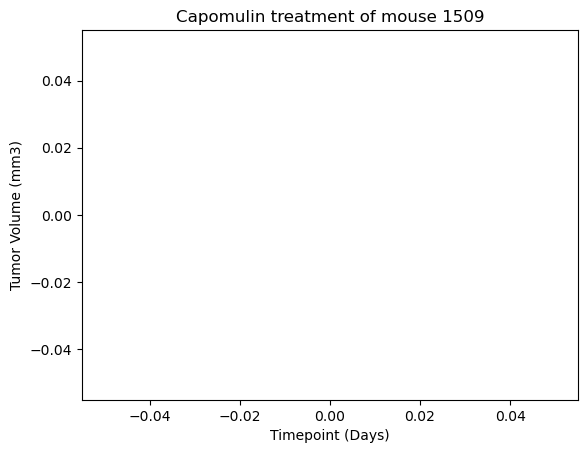

In [103]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_line=capomulin.loc[capomulin["Mouse ID"]=="1509",:]
x_axis=capomulin_line["Timepoint"]
tumor_size=capomulin_line["Tumor Volume (mm3)"]
fig1,ax1=plt.subplots()
plt.title('Capomulin treatment of mouse 1509')
plt.plot(x_axis,tumor_size)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

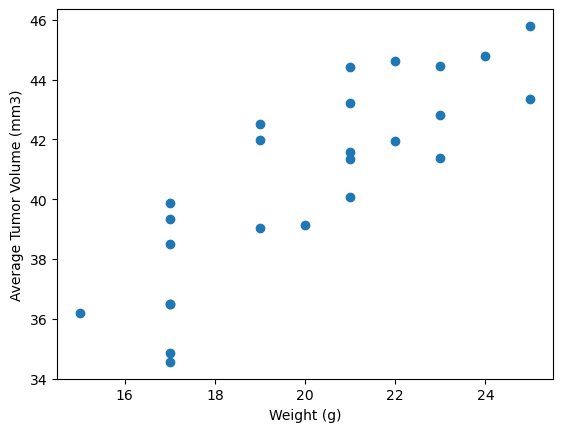

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


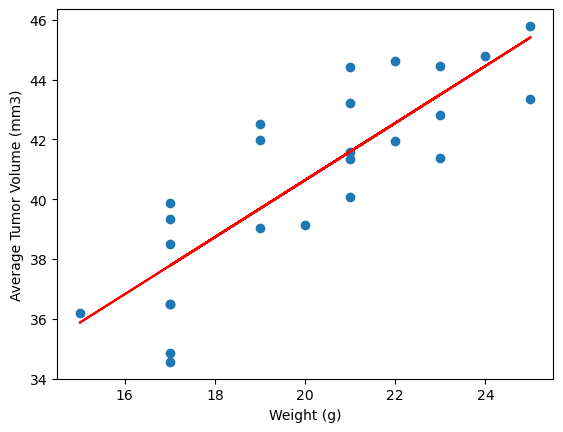

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
